# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare data

In [3]:
# 1. Load dataset
df = pd.read_csv('Preprocessed data.csv')

# 2. Prepare data
X = df.iloc[:,:-1]  # Replace with actual features
y = df.iloc[:,-1] #Replace with the actual target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (necessary for SVR and NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# models evaluation

In [4]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

# Train and evaluate models

# Linear algorithms

In [5]:
# Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train[['Hours_Studied']], y_train)  # Use only one feature for Simple LR
mse_lr, r2_lr, y_pred_lr = evaluate_model(lr, X_test[['Hours_Studied']], y_test)

# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mse_mlr, r2_mlr, y_pred_mlr = evaluate_model(mlr, X_test, y_test)


In [6]:
# Polynomial Linear Regression
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
mse_poly, r2_poly, y_pred_poly = evaluate_model(poly_reg, X_test_poly, y_test)

# multilayer perceptron
MLP = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
MLP.fit(X_train_scaled, y_train)
mse_MLP, r2_MLP, y_pred_MLP = evaluate_model(MLP, X_test_scaled, y_test)

# Non linear Algorithms

In [7]:
# Decision Tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
mse_tree, r2_tree, y_pred_tree = evaluate_model(tree, X_test, y_test)

# Random Forest
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
mse_forest, r2_forest, y_pred_forest = evaluate_model(forest, X_test, y_test)

# Non linear with feature scaling

In [8]:
# SVR
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
mse_svr, r2_svr, y_pred_svr = evaluate_model(svr, X_test_scaled, y_test)

In [9]:
# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.2))  # Regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Single output for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32)

mse_nn, r2_nn, y_pred_nn = evaluate_model(model, X_test_scaled, y_test)

Epoch 1/100


c:\Users\Fc\miniconda3\envs\APIs\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3537.6553 - val_loss: 64.4728
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96.4124 - val_loss: 37.7938
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83.3498 - val_loss: 29.9124
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.2266 - val_loss: 23.7418
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68.6917 - val_loss: 21.0575
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 62.1886 - val_loss: 18.0773
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58.2104 - val_loss: 17.2867
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.0575 - val_loss: 14.9073
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.6753 - val_loss: 14.0267
Epoch 10/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.8370 - val_loss: 11.5741
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.4226 - val_loss: 11.3382
Epoch 12/100
160/160 ━━━━━━━━

# Compare and visualize the performance

# R2 score and Mean saquared error

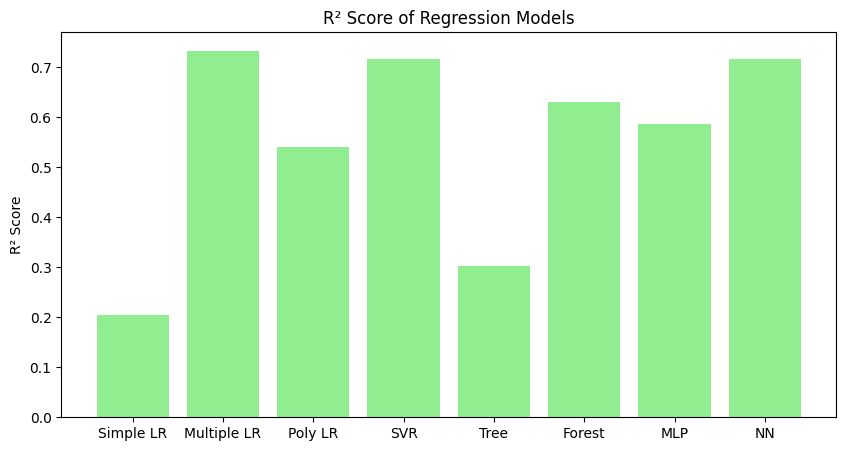

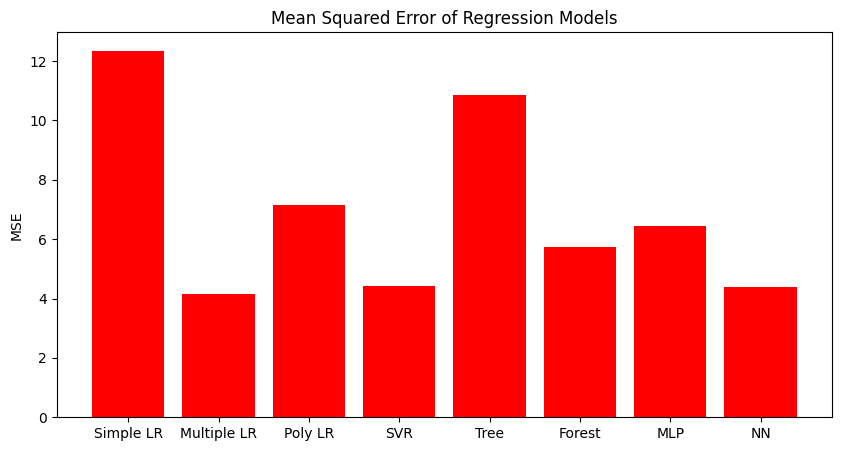

In [10]:
models = ['Simple LR', 'Multiple LR', 'Poly LR', 'SVR', 'Tree', 'Forest', 'MLP' ,'NN']
mses = [mse_lr, mse_mlr, mse_poly, mse_svr, mse_tree, mse_forest, mse_MLP, mse_nn]
r2s = [r2_lr, r2_mlr, r2_poly, r2_svr, r2_tree, r2_forest, r2_MLP ,r2_nn]

# Plotting R² scores
plt.figure(figsize=(10, 5))
plt.bar(models, r2s, color='lightgreen')
plt.title('R² Score of Regression Models')
plt.ylabel('R² Score')
plt.show()

# Plotting Mean Squared Error
plt.figure(figsize=(10, 5))
plt.bar(models, mses, color='red')
plt.title('Mean Squared Error of Regression Models')
plt.ylabel('MSE')
plt.show()



# Visualize predicted values with actual values

Text(0, 0.5, 'Predicted')

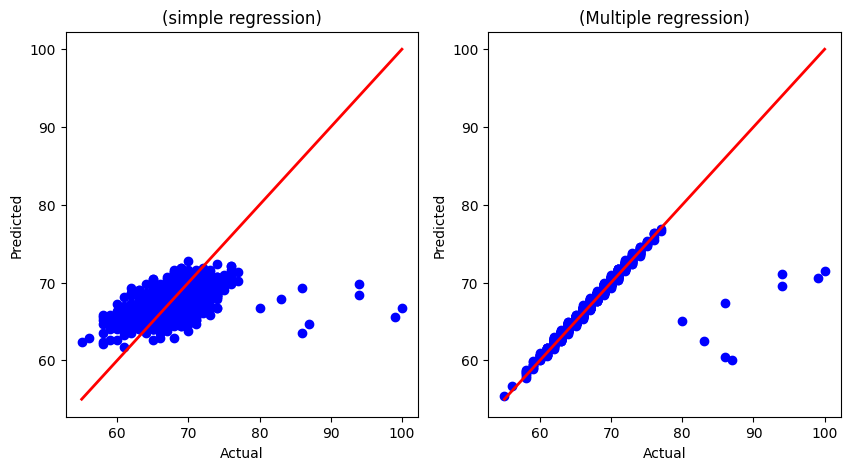

In [18]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2)

ax1 = plt.subplot(gs[0,0])
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('(simple regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

ax3 = plt.subplot(gs[0, 1])
plt.scatter(y_test, y_pred_mlr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('(Multiple regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')


Text(0, 0.5, 'Predicted')

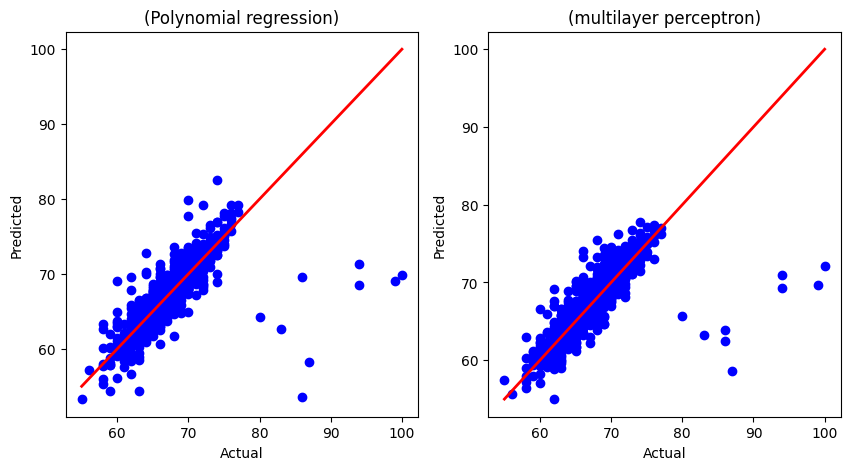

In [19]:
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2)

ax2 = plt.subplot(gs[0,0])
plt.scatter(y_test, y_pred_poly, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('(Polynomial regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

ax2 = plt.subplot(gs[0,1])
plt.scatter(y_test, y_pred_MLP, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('(multilayer perceptron)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

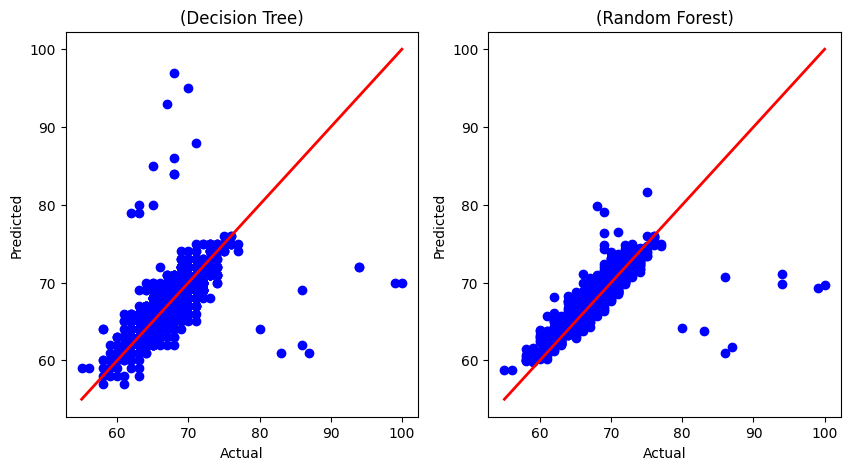

In [20]:
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2)

ax1 = plt.subplot(gs[0, 0])
plt.scatter(y_test, y_pred_tree, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('(Decision Tree)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

ax2 = plt.subplot(gs[0, 1])
plt.scatter(y_test, y_pred_forest, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('(Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

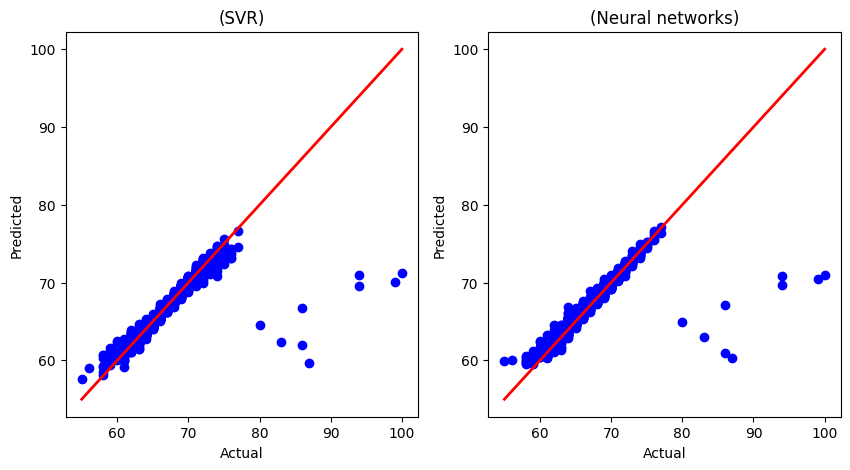

In [21]:
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2)

# plt.title('Actual vs Predicted')
ax1 = plt.subplot(gs[0, 0])
plt.scatter(y_test, y_pred_svr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('(SVR)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

ax3 = plt.subplot(gs[0,1])
plt.scatter(y_test, y_pred_nn, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('(Neural networks)')
plt.xlabel('Actual')
plt.ylabel('Predicted')